In [1]:
import numpy as np

def compute_spectrogram(signal, fs, nperseg, noverlap):
    # Convert the signal from mV to uV
    signal = signal * 1000
    
    step = nperseg - noverlap
    window = np.hanning(nperseg)
    freqs = np.fft.rfftfreq(nperseg, d=1/fs)
    times = []
    Sxx = []

    # Calculate the power of the window for normalization
    window_power = np.sum(window**2)

    for i in range(0, len(signal) - nperseg, step):
        segment = signal[i:i+nperseg]
        windowed_segment = segment * window
        fft_segment = np.fft.rfft(windowed_segment)
        
        # Normalize the power spectral density (PSD)
        power_segment = (np.abs(fft_segment)**2) / (window_power * fs)
        
        Sxx.append(power_segment)
        times.append(i/fs)

    Sxx = np.array(Sxx).T
    times = np.array(times)
    return freqs, times, Sxx


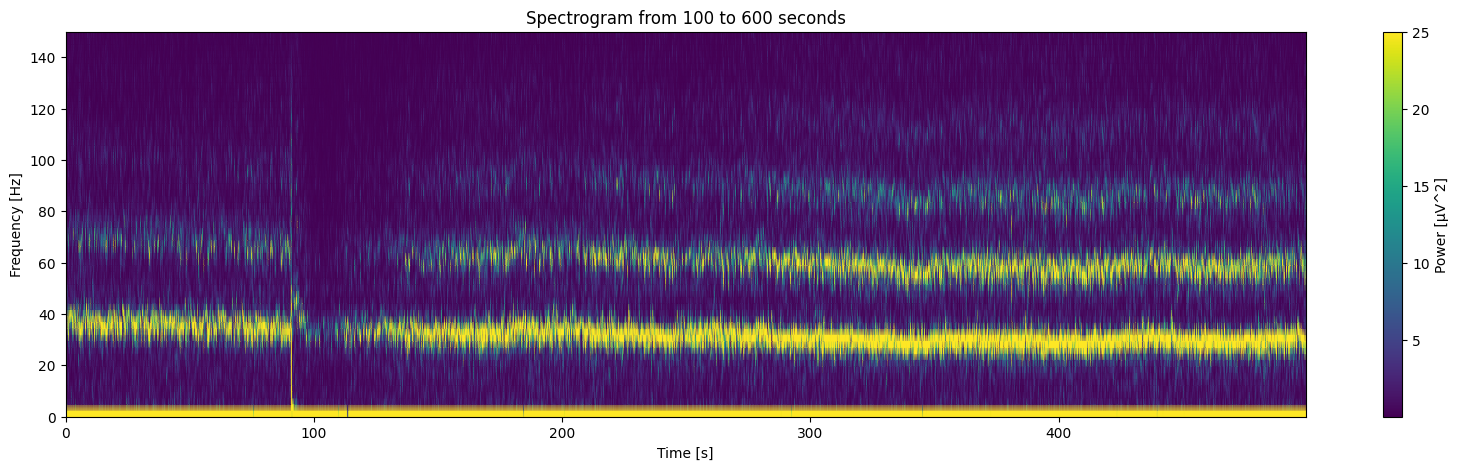

In [2]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = r"D:\Python Projects\Turner Lab\24031515.smr"
start_time = 100  # Replace with your actual start time in seconds
end_time = 600  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(20, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='viridis', vmin=np.percentile(Sxx, 5), vmax=25)
#plt.imshow(Sxx, aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()], 
           #cmap='viridis', vmin=np.percentile(Sxx, 5), vmax=25, origin='lower', interpolation='hamming')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()

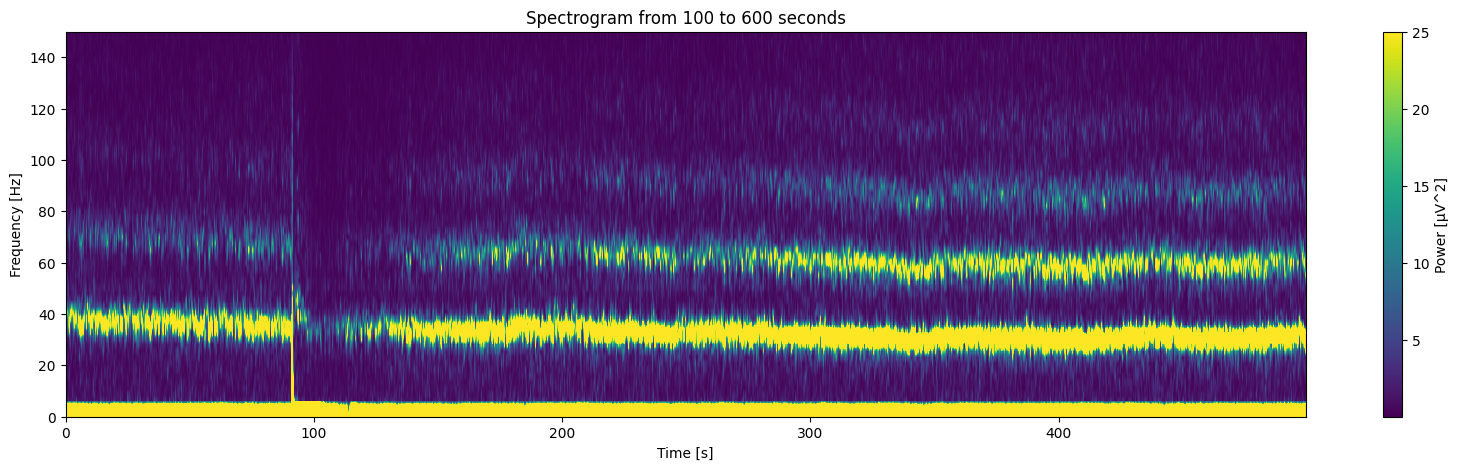

In [3]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = r"D:\Python Projects\Turner Lab\24031515.smr"
start_time = 100  # Replace with your actual start time in seconds
end_time = 600  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(20, 5))  # Stretched figure dimensions
#plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='inferno', vmin=np.percentile(Sxx, 5), vmax=25)
plt.imshow(Sxx, aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()], 
           cmap='viridis', vmin=np.percentile(Sxx, 5), vmax=25, origin='lower', interpolation='hamming')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()


In [12]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = r"/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/24032026.smr"
start_time = 100  # Replace with your actual start time in seconds
end_time = 300  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()


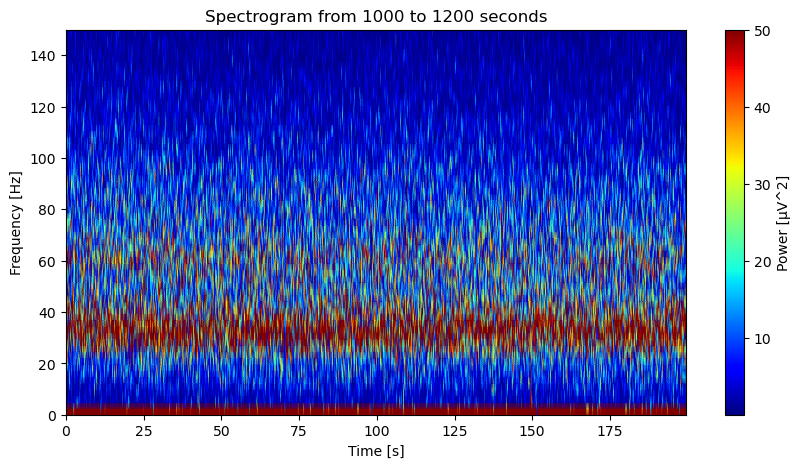

In [13]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = r"/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/24032026.smr"
start_time = 1000  # Replace with your actual start time in seconds
end_time = 1200  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()

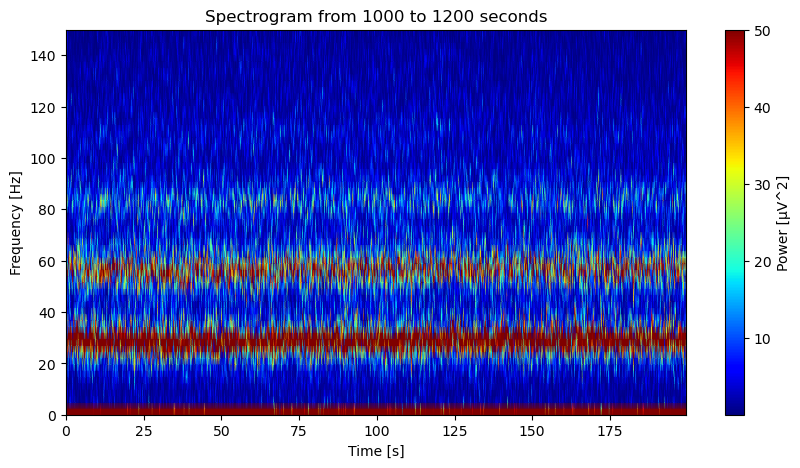

In [14]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = r"/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/24032029.smr"
start_time = 1000  # Replace with your actual start time in seconds
end_time = 1200  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()

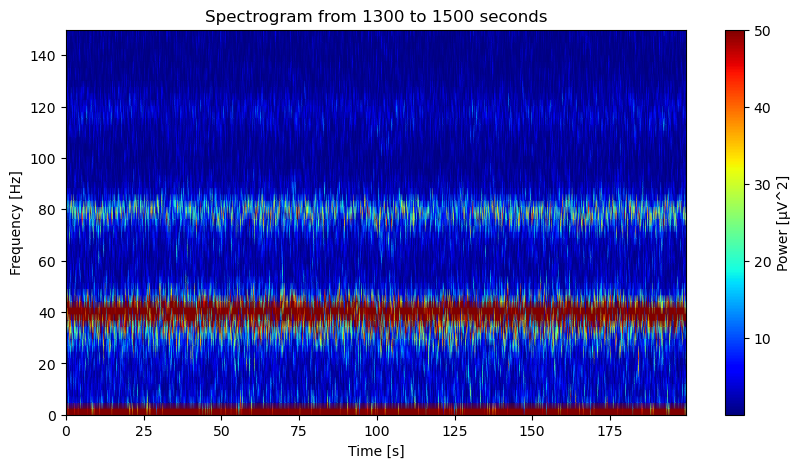

In [23]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = "24031313.smr"
start_time = 1300  # Replace with your actual start time in seconds
end_time = 1500  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()

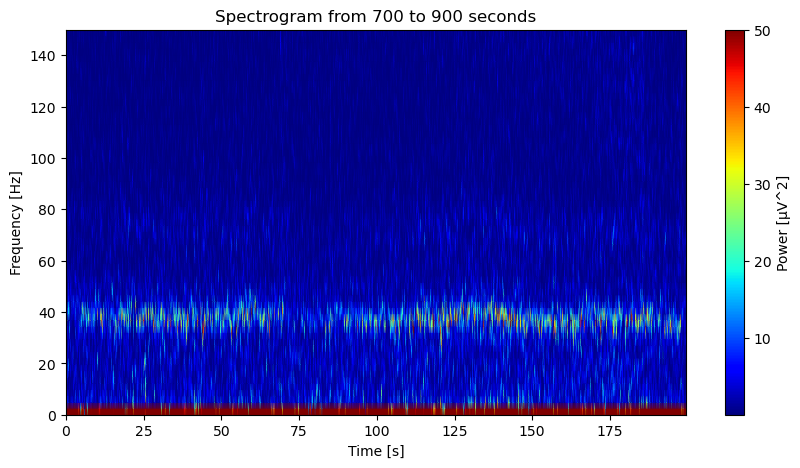

In [22]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = "24031314.smr"
start_time = 700  # Replace with your actual start time in seconds
end_time = 900  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()

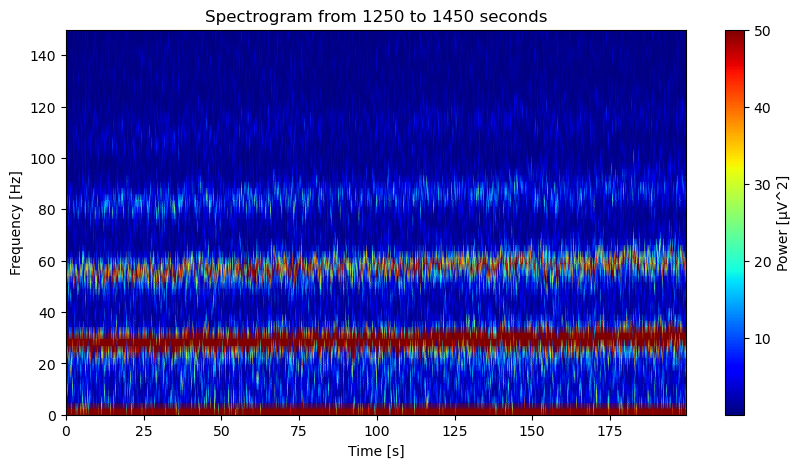

In [21]:
import matplotlib.pyplot as plt
from neo.io import Spike2IO

# Parameters
file_path = "24031314.smr"
start_time = 1250  # Replace with your actual start time in seconds
end_time = 1450  # Replace with your actual end time in seconds
sampling_rate = 20000  # Sampling rate of the recording (Hz)
nperseg = 8129  # Window size for the FFT
noverlap = 4096  # Overlap between windows
channel_index = 3  # Replace '3' with the index of your channel

# Load the .smr file
reader = Spike2IO(filename=file_path)
block = reader.read_block()
segment = block.segments[0]
signal = segment.analogsignals[channel_index].squeeze()

# Convert start and end times to indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the relevant signal segment
segment_signal = signal[start_index:end_index]

# Compute the spectrogram
freqs, times, Sxx = compute_spectrogram(segment_signal, sampling_rate, nperseg, noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 5))  # Stretched figure dimensions
plt.pcolormesh(times, freqs, Sxx, shading='gouraud', cmap='jet', vmin=np.percentile(Sxx, 5), vmax=50)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram from {start_time} to {end_time} seconds')
plt.colorbar(label='Power [µV^2]')
plt.ylim(0, 150)  # Frequency limit to 150 Hz

plt.show()

# Optionally, save the figure
#save_path = 'spectrogram_single_segment.png'
#plt.savefig(save_path, dpi=300)
#plt.close()